# Deep Learning Experiment - One unit network

In [11]:
import os
if  not os.path.isdir('./training'):
  !cd /content/ && git clone https://github.com/MontpellierRessourcesImagerie/DL_EXP_PC.git && cp -r DL_EXP_PC/data . && cp -r DL_EXP_PC/training .
  %cd DL_EXP_PC

We create a network that consists of one unit only. The input data are numbers between 0 and 1. The unit will learn to classify high numbers (>=0.5) and low numbers (<0.5).

## Training data

The training data X is a linear array of 100 numbers between 0 and 1. Numbers below 0.5 are labelled 0 and numbers equal to and above 0.5 are labelled 1 in y. The input data is shuffeled to be in random order.

In [1]:
import numpy as np
X = np.array(list(range(0,100,1)))/100
y = (X>=0.5)*1
seed = np.random.randint(0, 2**(32 - 1) - 1) 
rstate = np.random.RandomState(seed)
rstate.shuffle(X)
rstate = np.random.RandomState(seed)
rstate.shuffle(y)
print(X)
print(y)

[0.51 0.21 0.7  0.75 0.   0.4  0.95 0.99 0.81 0.48 0.22 0.78 0.91 0.45
 0.25 0.94 0.89 0.98 0.29 0.41 0.07 0.26 0.34 0.11 0.01 0.68 0.74 0.85
 0.72 0.32 0.09 0.15 0.46 0.04 0.6  0.66 0.42 0.88 0.27 0.36 0.86 0.02
 0.14 0.49 0.8  0.62 0.61 0.13 0.96 0.83 0.53 0.16 0.55 0.3  0.58 0.79
 0.33 0.28 0.9  0.57 0.97 0.82 0.06 0.71 0.92 0.19 0.67 0.23 0.05 0.87
 0.17 0.24 0.43 0.03 0.56 0.93 0.35 0.5  0.54 0.52 0.65 0.69 0.08 0.37
 0.84 0.63 0.38 0.76 0.44 0.47 0.31 0.77 0.59 0.18 0.1  0.64 0.39 0.73
 0.2  0.12]
[1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0]


# Creating the network

The network has one number as input. It consists of one unit that produces an output. The only unit uses the relu-activation function. 

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


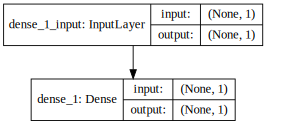

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import SVG
from keras.utils import model_to_dot

model = Sequential()
model.add(Dense(1, input_dim=(1), activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

The model only has two parameters the weight of the only connection from the input to the unit and the bias of the only unit.

In [10]:
model.get_weights()

[array([[1.2196743]], dtype=float32), array([-0.08796682], dtype=float32)]

## Traininig

We use 25% of the numbers for validation and train the network with the remaining 75%.

In [4]:
%%time
history = model.fit(X, y, validation_split=0.25, epochs=300, batch_size=16, verbose=0)
print("Loss: ", history.history['val_loss'][-1], "Accuracy: ", history.history['val_accuracy'][-1])

Loss:  0.32507207095623014 Accuracy:  1.0
CPU times: user 2.23 s, sys: 170 ms, total: 2.4 s
Wall time: 1.72 s


We plot the history of the validation accuracy and loss.

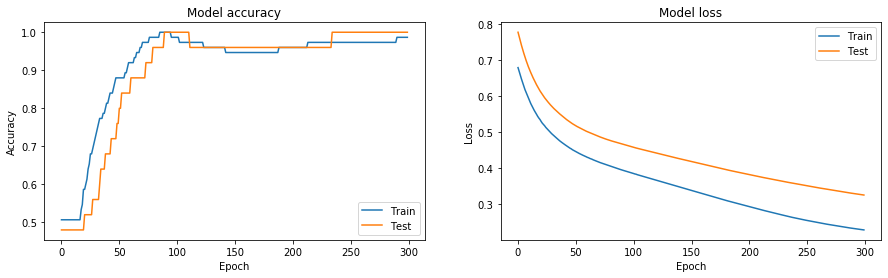

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## The output of the unit

If the training worked correctly, the classification should 0 for inputs beloww 0.5 and 1 for inputs equal to or above 0.5. Since we use the relu-activation the predictions are not between 0 and 1. We plot the classifications and the predications for input values from 0 to 1 with with a step of one 1/1000.

The predications should be a line that goes through (0.5, 0.5).

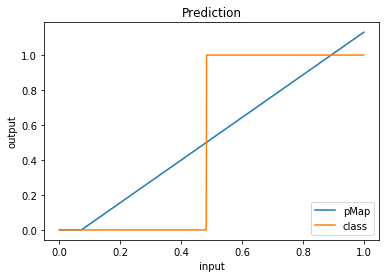

In [6]:
values = np.array(list(range(0,1000))) / 1000
prediction = model.predict(values)
classPrediction = model.predict_classes(values)
# Plot training & validation accuracy values
plt.plot(values, prediction)
plt.plot(values, classPrediction)
plt.title('Prediction')
plt.ylabel('output')
plt.xlabel('input')
plt.legend(['pMap', 'class'], loc='lower right')
plt.show()

In [7]:
weights = model.get_weights()
weights

[array([[1.2196743]], dtype=float32), array([-0.08796682], dtype=float32)]

The learned linear function is 

In [8]:
f"f(x) = {weights[1][0]} + {weights[0][0][0]} * x"

'f(x) = -0.08796682208776474 + 1.2196743488311768 * x'

In [9]:
a = weights[1][0]
m = weights[0][0][0]
a + m * 0.5 

0.5218703523278236